In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import tonic
import matplotlib as mpl
import scienceplots
plt.style.use(['science', 'grid'])
# plt.style.use(['science'])

/home/stevenabreu/miniconda3/envs/dvsflow/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [13]:
def get_event(fn, idx, min_evts=1_000):
    data_folder = f'../data/bin_1ms_comp'
    l_evts = np.load(f'{data_folder}/{fn}.npy', allow_pickle=True)
    l_evtsf = [e for e in l_evts if e.shape[0] > min_evts]
    evts = l_evtsf[idx]
    evts['t'] -= evts['t'].min()
    return evts

/tmp/ipykernel_8331/3624208053.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap('winter')


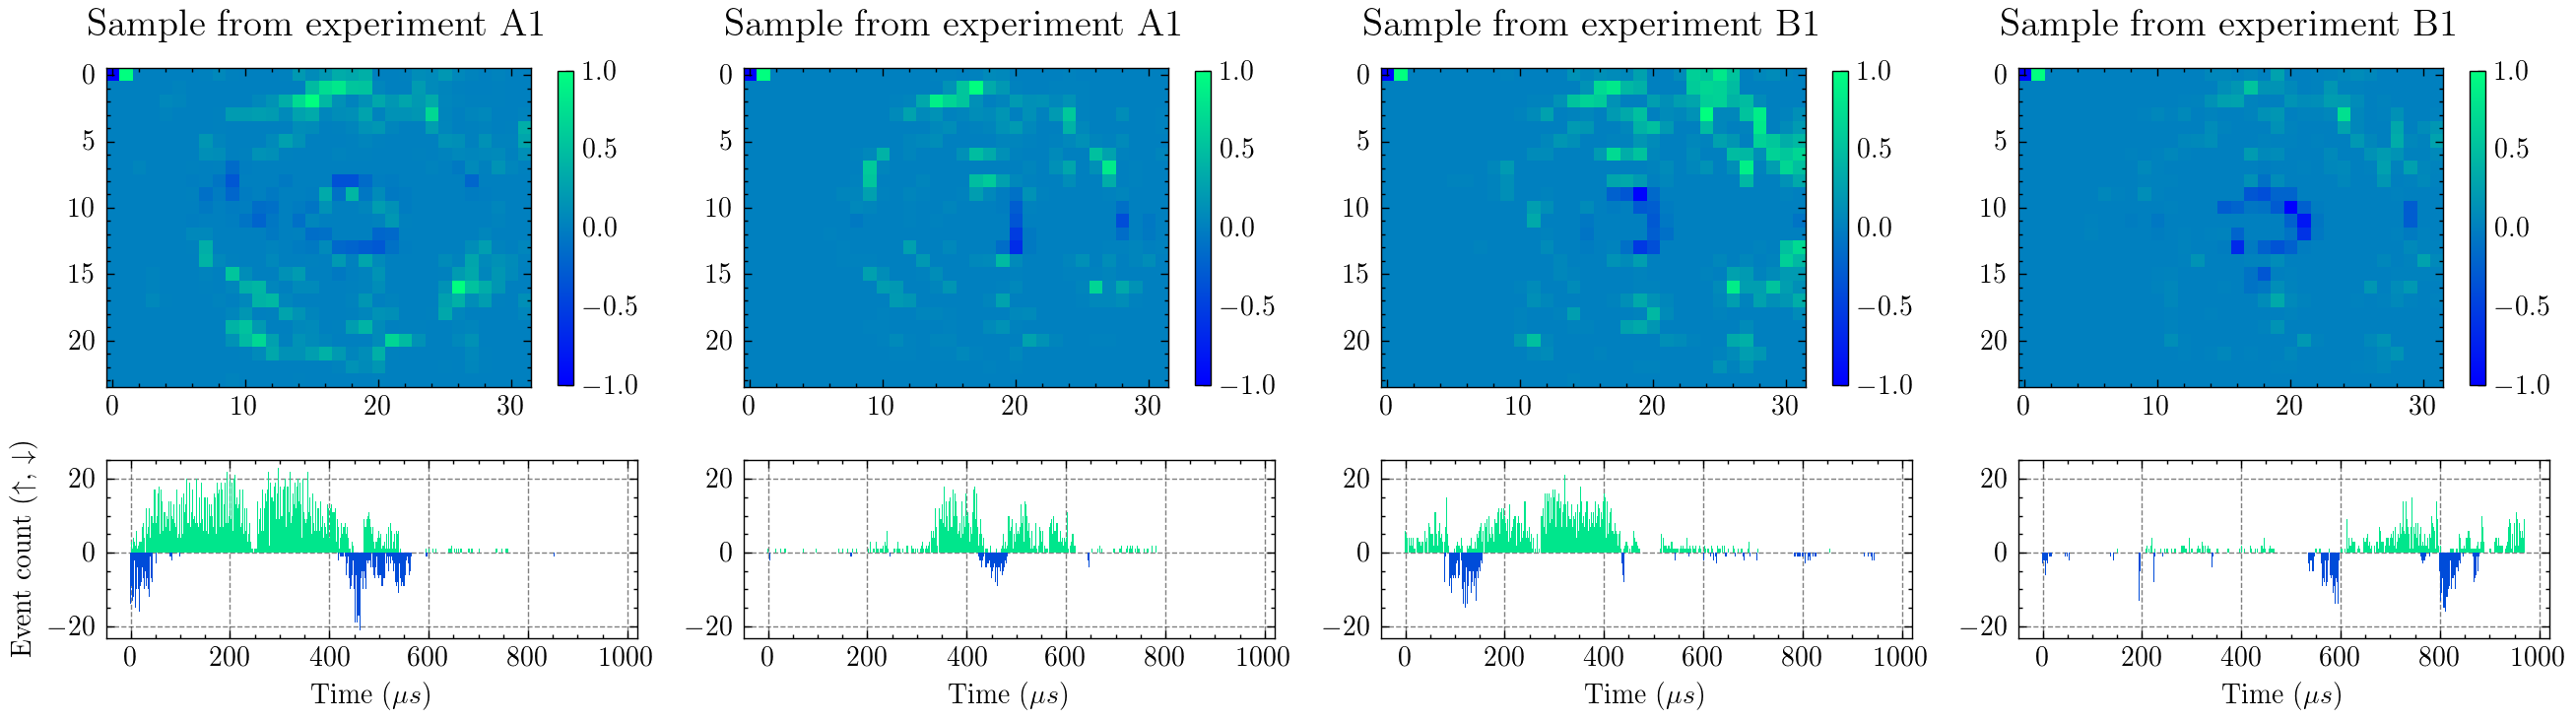

In [55]:
# configure overall plot
cols = 4
size = 4
fig = plt.figure(figsize=(size*cols, size), dpi=200)
gs = fig.add_gridspec(3, cols)

# configure colors
cmap = mpl.cm.get_cmap('winter')
c1 = cmap(0.9)
c2 = cmap(0.3)

# evts_idxs = random.choices(range(1, 1000), k=2)
# print(evts_idxs)
# fns = ['A3', 'B3']
# cutoff 1000
l_fn_idx = [('A1', 613), ('A1', 564), ('B1', 278), ('B1', 390), ('B1', 395), ('B1', 5), ('A3', 369), ('B3', 626), ('B3', 559)]

for col_idx in range(cols):
    ax1 = fig.add_subplot(gs[0:2, col_idx])
    if col_idx == 0:
        ax2 = fig.add_subplot(gs[2, col_idx])
    else:
        ax2 = fig.add_subplot(gs[2, col_idx], sharex=ax2, sharey=ax2)

    fn, ev_idx = l_fn_idx[col_idx]
    evts = get_event(fn, ev_idx)

    ax = ax1
    ax.set_title(f'Sample from experiment {fn}', fontsize=14, y=1.05)
    img = tonic.transforms.ToImage(sensor_size=(32, 24, 2,))(evts)
    img = (img[1] - img[0])
    img = img / np.abs(img).max()
    img[0,0] = -1
    img[0,1] = 1
    c = ax.imshow(img, cmap=cmap)
    plt.colorbar(c, ticks=[-1, -0.5, 0, 0.5, 1], shrink=0.8)
    ax.grid(False)
    # ax.set_yticks([])
    # ax.set_xticks([])

    ax = ax2
    n_bins = 1_000
    n_bins = 500
    rw = 1.
    up_data = np.histogram(evts[evts['p'] == 1]['t'], bins=n_bins)
    down_data = np.histogram(evts[evts['p'] == 0]['t'], bins=n_bins)
    ax.bar(up_data[1][:-1], up_data[0], width=(up_data[1][1]-up_data[1][0])*rw, color=c1)
    ax.bar(down_data[1][:-1], -1*down_data[0], width=(down_data[1][1]-down_data[1][0])*rw, color=c2)
    ax.set_xlabel('Time ($\mu s$)')
    if col_idx == 0:
        ax.set_ylabel('Event count ($\\uparrow$, $\\downarrow$)')

# plt.tight_layout()
plt.savefig('eda_samples.pdf')

## old code

In [ ]:
def plot_sample(data, comp:str, dt, fn='A1', nrows=4, ncols=4, style='hist'):
    data_folder = f'../data/{data}_{dt}ms{"_" if len(comp) else ""}{comp}'
    MIN_EVTS = 1_000  # NOTE: hard coded for now
    l_evts = np.load(f'{data_folder}/{fn}.npy', allow_pickle=True)
    l_evtsf = [e for e in l_evts if e.shape[0] > MIN_EVTS]
    print(f'{len(l_evtsf):,} time bins with > 1k events '
        f'({len(l_evtsf)/len(l_evts):.1%} of total: {len(l_evts):,})')

    fs = (4*ncols, 2*nrows) if style == 'hist' else (4*ncols, 4*nrows)
    fig, axs = plt.subplots(ncols=ncols, nrows=nrows, sharex=True, sharey=True, figsize=fs, dpi=200)
    fig.suptitle(f'event count over time ({dt}ms bins with > 1k events), {fn} {comp}')
    for axidx, idx in enumerate(random.sample(range(len(l_evtsf)), nrows*ncols)):
        print(f'{l_evtsf[idx].shape[0]:,} events', end='\n' if axidx % ncols == ncols-1 else ', ')
        data = l_evtsf[idx]
        data['t'] -= (data['t'].min() // 1000) * 1000
        ax = axs[axidx//4][axidx%4]
        if style == 'hist':
            plot_event_count_ax(ax, data, n_bins=1_000)
        elif style == 'img':
            plot_image_ax(ax, data)
    fig.tight_layout()

fn = 'A1'
plot_sample('bin', 'comp', 1, fn=fn, nrows=2, ncols=4, style='img')

def plot_samples_old(data, comp:str, dt, fn='A1', nrows=4, ncols=4, style='hist'):
    data_folder = f'../data/{data}_{dt}ms{"_" if len(comp) else ""}{comp}'
    MIN_EVTS = 1_000  # NOTE: hard coded for now
    l_evts = np.load(f'{data_folder}/{fn}.npy', allow_pickle=True)
    l_evtsf = [e for e in l_evts if e.shape[0] > MIN_EVTS]
    print(f'{len(l_evtsf):,} time bins with > 1k events '
        f'({len(l_evtsf)/len(l_evts):.1%} of total: {len(l_evts):,})')

    fs = (4*ncols, 2*nrows) if style == 'hist' else (4*ncols, 4*nrows)
    fig, axs = plt.subplots(ncols=ncols, nrows=nrows, sharex=True, sharey=True, figsize=fs, dpi=200)
    fig.suptitle(f'event count over time ({dt}ms bins with > 1k events), {fn} {comp}')
    for axidx, idx in enumerate(random.sample(range(len(l_evtsf)), nrows*ncols)):
        print(f'{l_evtsf[idx].shape[0]:,} events', end='\n' if axidx % ncols == ncols-1 else ', ')
        data = l_evtsf[idx]
        data['t'] -= (data['t'].min() // 1000) * 1000
        ax = axs[axidx//4][axidx%4]
        if style == 'hist':
            plot_event_count_ax(ax, data, n_bins=1_000)
        elif style == 'img':
            plot_image_ax(ax, data)
    fig.tight_layout()

In [ ]:
def plot_image_ax(ax, evts):
    img = tonic.transforms.ToImage(sensor_size=(32, 24, 2,))(evts)
    N = 100
    img[0,0,0] = N
    img[1,0,0] = 0
    img[1,0,1] = N
    img[0,0,1] = 0
    ax.imshow(img[1]-img[0])#, cmap='gray')
    ax.set_yticks([])
    ax.set_xticks([])
    # ax.grid(False)
def plot_event_count_ax(ax, evts, n_bins=1_000):
    up_data = np.histogram(evts[evts['p'] == 1]['t'], bins=n_bins)
    down_data = np.histogram(evts[evts['p'] == 0]['t'], bins=n_bins)
    ax.bar(up_data[1][:-1], up_data[0], width=up_data[1][1]-up_data[1][0])
    ax.bar(down_data[1][:-1], -1*down_data[0], width=down_data[1][1]-down_data[1][0])
    # ax.grid()